Exponential Smoothing 

**Objective is to forecast stock prices in Q1 2021 with the data from 2020.**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [4]:
data = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\APZIVA\Project 5\stock_price_data.csv')

In [5]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,31-Mar-21,291.02,294.00,294.42,290.26,47.00M,-0.76%
1,30-Mar-21,293.25,294.86,295.72,291.50,38.81M,-0.02%
2,29-Mar-21,293.30,289.72,294.09,289.26,43.68M,0.71%
3,26-Mar-21,291.22,288.63,292.75,288.32,56.07M,1.59%
4,25-Mar-21,286.66,286.50,287.03,283.85,35.22M,0.30%


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      311 non-null    object 
 1   Price     311 non-null    float64
 2   Open      311 non-null    float64
 3   High      311 non-null    float64
 4   Low       311 non-null    float64
 5   Vol.      311 non-null    object 
 6   Change %  311 non-null    object 
dtypes: float64(4), object(3)
memory usage: 17.1+ KB


convert to datetime

In [8]:
# change 'Date' to a datetime object
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      311 non-null    datetime64[ns]
 1   Price     311 non-null    float64       
 2   Open      311 non-null    float64       
 3   High      311 non-null    float64       
 4   Low       311 non-null    float64       
 5   Vol.      311 non-null    object        
 6   Change %  311 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 17.1+ KB


In [10]:
data.min()

Date        2020-01-03 00:00:00
Price                    174.27
Open                      175.0
High                      182.2
Low                      172.15
Vol.                    100.09M
Change %                 -0.01%
dtype: object

sort data in ascending order by date

In [12]:

data = data.sort_values(by='Date')

In [13]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
310,2020-01-03,255.00,255.99,258.19,253.70,35.85M,0.10%
309,2020-01-06,253.90,254.75,254.84,251.40,22.35M,-0.43%
308,2020-01-08,259.15,253.57,259.15,253.03,40.82M,2.07%
307,2020-01-09,257.99,259.40,261.76,257.01,38.33M,-0.45%
306,2020-01-10,258.19,257.86,259.25,256.88,18.85M,0.08%


In [14]:
data.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [15]:
data = data.drop(columns = ['Open', 'High', 'Low', 'Vol.', 'Change %'])

In [16]:
def lineplot(x,y,data_,title_):
    sns.set(rc = {'figure.figsize':(15,8)})
    # Bigger than normal fonts
    sns.set(font_scale=1.5)
    sns.set_style('darkgrid')
    chart = sns.lineplot(x = x, y = y, data = data_)
    chart.set(title=title_)
    plt.show()

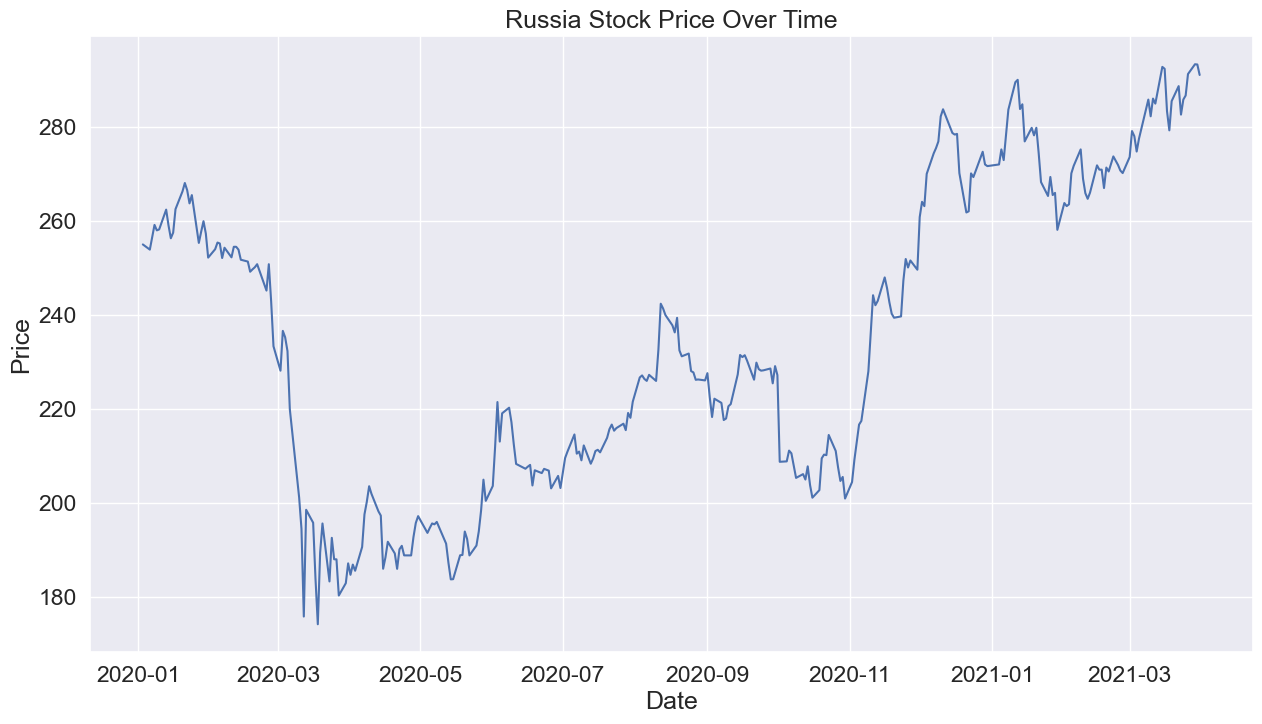

In [17]:
lineplot(x='Date',y='Price',data_=data,title_='Russia Stock Price Over Time')

In [18]:
# **create train_data**
train_data = data[data.Date <= '2020-12-31']

In [19]:
train_data.Date.min()

Timestamp('2020-01-03 00:00:00')

In [20]:
train_data.Date.max()

Timestamp('2020-12-30 00:00:00')

In [21]:
train_data.head()

,Date,Price
310,2020-01-03,255.00
309,2020-01-06,253.90
308,2020-01-08,259.15
307,2020-01-09,257.99
306,2020-01-10,258.19


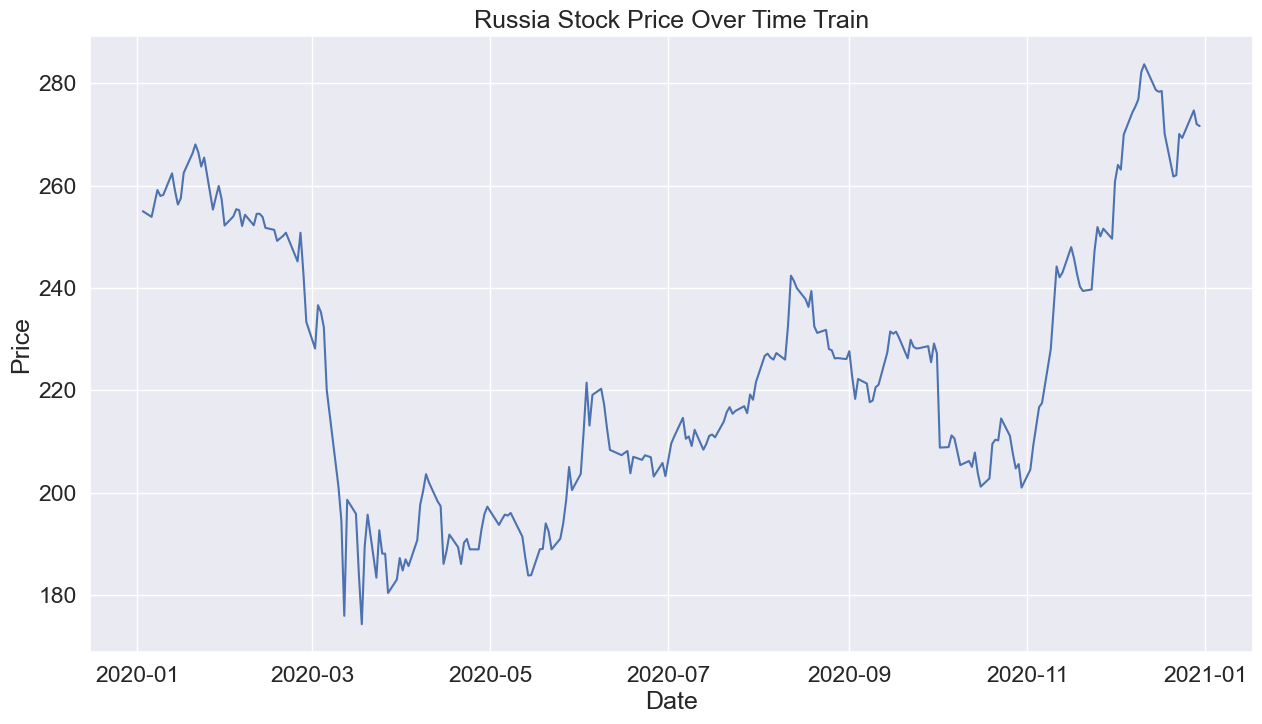

In [22]:
lineplot(x='Date',y='Price',data_=train_data,title_='Russia Stock Price Over Time Train')

In [23]:
# **create test_data**
test_data =data[data.Date > '2020-12-31']

In [24]:
print('min',test_data.Date.min())

min 2021-01-04 00:00:00


In [25]:
print('max  ',test_data.max())
test_data.head()


max   Date     2021-03-31 00:00:00
Price                  293.3
dtype: object


,Date,Price
60,2021-01-04,272.00
59,2021-01-05,275.20
58,2021-01-06,272.93
57,2021-01-08,283.64
56,2021-01-11,289.49


In [26]:
print('min  ',test_data.min())
test_data.head()


min   Date     2021-01-04 00:00:00
Price                 258.11
dtype: object


,Date,Price
60,2021-01-04,272.00
59,2021-01-05,275.20
58,2021-01-06,272.93
57,2021-01-08,283.64
56,2021-01-11,289.49


In [27]:
train_data.head()

,Date,Price
310,2020-01-03,255.00
309,2020-01-06,253.90
308,2020-01-08,259.15
307,2020-01-09,257.99
306,2020-01-10,258.19


In [28]:
type(train_data)

pandas.core.frame.DataFrame

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 310 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    250 non-null    datetime64[ns]
 1   Price   250 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.9 KB


In [30]:
train_data.shape

(250, 2)

Correct Exponential Smoothing

          Date    Forecast
311 2021-01-01  291.136491
312 2021-01-04  291.252975
313 2021-01-05  291.369458
314 2021-01-06  291.485942
315 2021-01-07  291.602425
..         ...         ...
370 2021-03-25  298.009020
371 2021-03-26  298.125504
372 2021-03-29  298.241988
373 2021-03-30  298.358471
374 2021-03-31  298.474955

[64 rows x 2 columns]


C:\Users\dgarb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dgarb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\dgarb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: title={'center': 'Stock Price Forecast'}, xlabel='Date'>

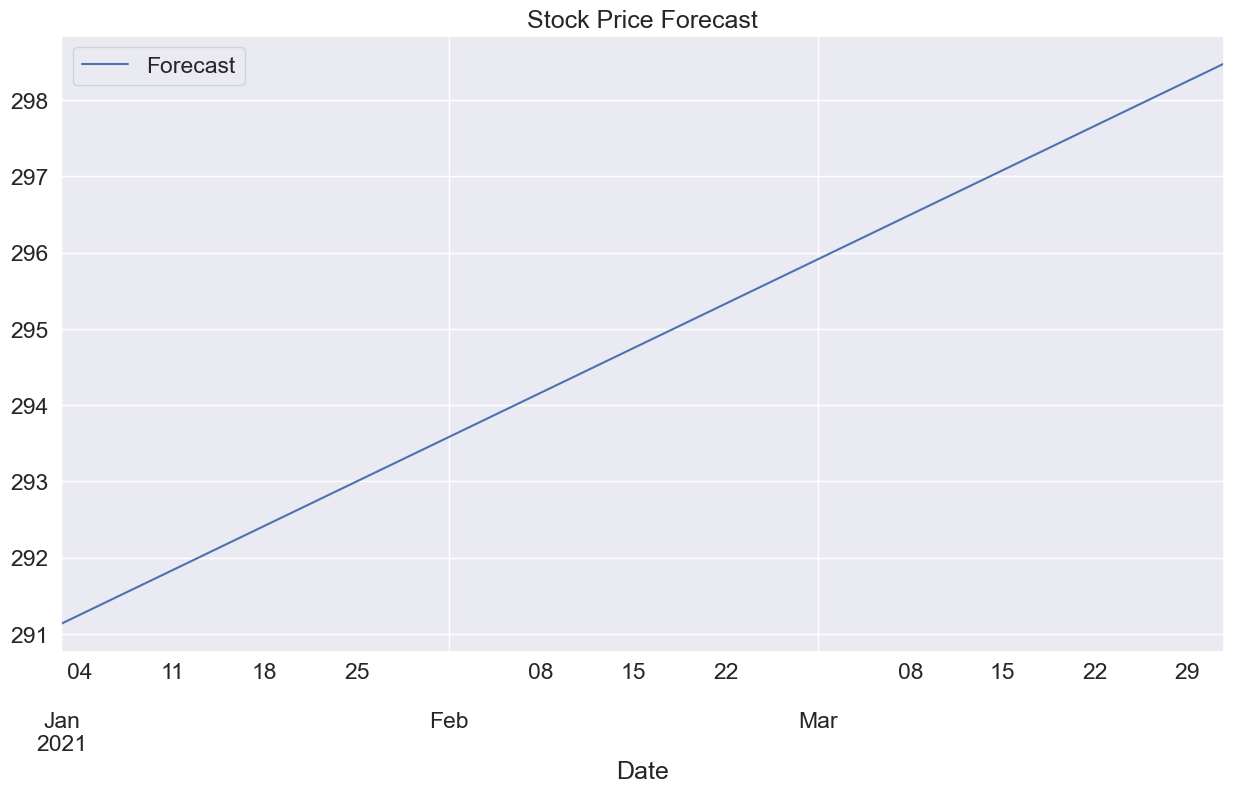

In [76]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming data is already loaded in a DataFrame named 'data'
# Fit the model using the 'Price' column
model = ExponentialSmoothing(data['Price'], trend='additive', seasonal=None)
fit = model.fit()

# Generate business days for the first quarter of 2021
forecast_dates = pd.date_range(start='2021-01-01', end='2021-03-31', freq='B')
steps = len(forecast_dates)

# Forecast for the first quarter of 2021
forecast = fit.forecast(steps=steps)

# Combine the forecast with the dates for the forecast period
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast})

# Print or plot the forecast
print(forecast_df)
forecast_df.plot(x='Date', y='Forecast', title='Stock Price Forecast')

In [60]:
def calculate_mape(actual, forecast):
    actual = np.array(actual)
    forecast = np.array(forecast)
    return np.mean(np.abs((actual - forecast) / actual)) * 100

In [70]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 60 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    61 non-null     datetime64[ns]
 1   Price   61 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB


In [78]:
forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 311 to 374
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      64 non-null     datetime64[ns]
 1   Forecast  64 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


In [80]:
comparison =  forecast_df.merge(test_data, on='Date',how='inner')
comparison.head()                        

,Date,Forecast,Price
0,2021-01-04,291.252975,272.00
1,2021-01-05,291.369458,275.20
2,2021-01-06,291.485942,272.93
3,2021-01-08,291.718909,283.64
4,2021-01-11,291.835392,289.49


In [82]:
def calculate_mape(actual, forecast):
    actual = np.array(actual)
    forecast = np.array(forecast)
    return np.mean(np.abs((actual - forecast) / actual)) * 100

In [84]:
calculate_mape(comparison.Price, comparison.Forecast)

6.6079829800752385